### DataSets:
You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

- Cab_Data.csv – this file includes details of transaction for 2 cab companies

- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

- City.csv – this file contains list of US cities, their population and number of cab users

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from datetime import datetime

In [3]:
datetime_object = datetime.now()
print(f'Type: {type(datetime_object)}')

Type: <class 'datetime.datetime'>


In [4]:
data = pd.read_csv('./DataSets/Cab_Data.csv')
city_data = pd.read_csv('./DataSets/City.csv')
customer_data = pd.read_csv('./DataSets/Customer_ID.csv')
transaction_data = pd.read_csv('./DataSets/Transaction_ID.csv')

In [5]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


- Transaction id:Unique identifier of every transaction. 
- Date of Travel:is the day the trip happened.
- Company:Names of cab companies.
- City:Geographical area the cabs operate in
- KM travelled:Distance covered in Km by the cabs
- Price charged: The total amount a customer is charged for distance covered.
- Cost of trip: The Expenses per trip.

### Observation
- date of travel column has an excel serial number format as entries

In [7]:
# Converting Cab_Data dataset to excel file format
data.to_excel('./DataSets/Cab_Data.xlsx')

In [8]:
#Reading our formated excel file
new_data = pd.read_excel('./DataSets/new_Cab_Data.xlsx')

In [9]:
new_data.head()

,Unnamed: 0,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Observation 
- travel date is in date format (year-month-date) as an object

In [10]:
new_data.to_csv('./DataSets/new_Cab_Data.csv')

In [11]:
cab_data = pd.read_csv('./DataSets/new_Cab_Data.csv', index_col=None)

In [12]:
cab_data.head()

,Unnamed: 0,Unnamed: 0.1,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,0,0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,1,1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,2,2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,3,3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,4,4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
# How to remove unnamed columns
cab_data.drop(cab_data.columns[cab_data.columns.str.contains('unnamed',case=False)], axis =1, inplace= True)

In [14]:
# Converting Date of Travel data type from string to datetime object
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'],format= '%Y-%m-%d')

In [15]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [16]:
cab_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [17]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [18]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Observation
- Cab_data has no missing values
- Transaction id is of data type int while its a unique identifier.

In [19]:
# Checking Statistsical inference
# Excluding various data types such object, int64, date64[ns]
cab_data.describe(exclude =['int64','datetime64[ns]','object']).T

,count,mean,std,min,25%,50%,75%,max
KM Travelled,359392.0,22.567254,12.233526,1.9,12.0000,22.44,32.9600,48.00
Price Charged,359392.0,423.443311,274.378911,15.6,206.4375,386.36,583.6600,2048.03
Cost of Trip,359392.0,286.190113,157.993661,19.0,151.2000,282.48,413.6832,691.20


Observation:
- Through checking descriptive view of our attributes it clear indicates their are outliers in our cab_data dataset

In [20]:
# Editing columns to be more readable
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})

In [21]:
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [22]:
# returns unique values in an element
cab_data['Date_of_Travel'].nunique()

1095

In [23]:
cab_data.groupby('Date_of_Travel').Transaction_ID.count().sort_values(ascending=False).head(10)

Date_of_Travel
2018-01-05    2022
2017-12-15    1123
2017-12-08    1100
2018-12-15    1086
2017-11-24    1085
2018-12-22    1084
2018-12-14    1076
2017-12-22    1042
2018-11-24    1037
2018-01-06    1032
Name: Transaction_ID, dtype: int64

In [24]:
# Converting the Date of Travel column into months and columns
months = []
years = []

for i in range (len(cab_data['Date_of_Travel'])):
    months.append(cab_data['Date_of_Travel'][i].month)
    years.append(cab_data['Date_of_Travel'][i].year)
cab_data['Month'] = months
cab_data['Year'] = years

In [25]:
cab_data.drop(['Date_of_Travel'], axis = 1)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016
...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018


In [26]:
# checking how many transactions happened in different months
diag = cab_data.groupby('Month').Transaction_ID.count()

#### **Yearly Transactional Analysis**

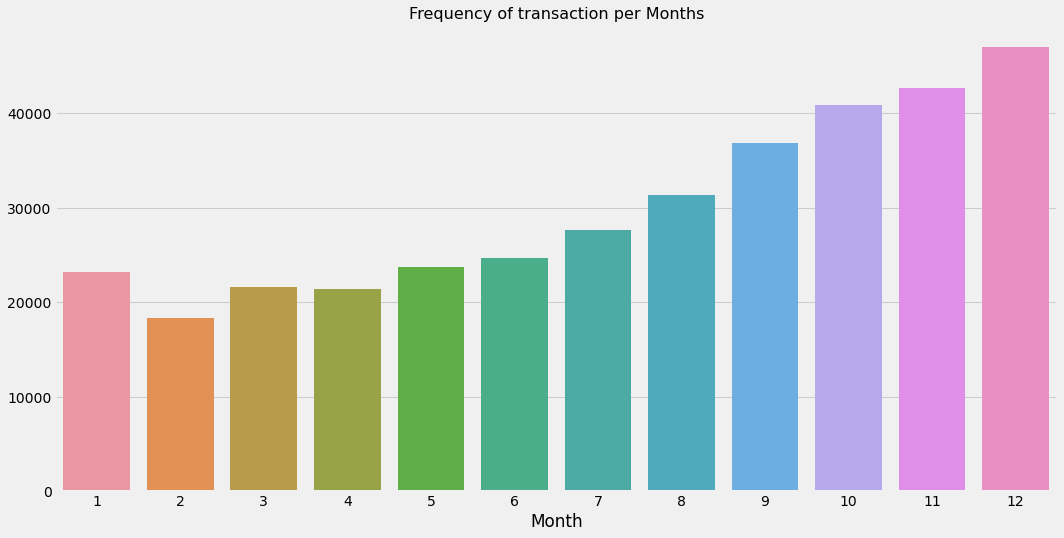

In [27]:
plt.figure(figsize = (16,8))
sns.barplot(x= diag.index, y = diag.values)
plt.title('Frequency of transaction per Months', weight = '20').set_fontsize('16')
plt.show()

### Observation:
 - Frequencies of Transactions occured during different months shows they increased throughout the year except the months of February, march and aprill which remained stagnant.   

In [28]:
diag2 = cab_data.groupby(['Year', 'Company']).Transaction_ID.count()

In [29]:
diag2

Year  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Transaction_ID, dtype: int64

OBservation :
- The above information shows Pink Cab comapany has a large number of transactions carried over in 3 years than Yellow Cab   

In [30]:
# Transactions share by company
cab_data.groupby(['Company']).Transaction_ID.count()

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

In [31]:
diag3 = cab_data[cab_data.Company== 'Pink Cab'].groupby(['Month']).Transaction_ID.count()

In [32]:
diag3

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

In [33]:
diag4 = cab_data[cab_data.Company== 'Yellow Cab'].groupby(['Month']).Transaction_ID.count()

In [34]:
diag4

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

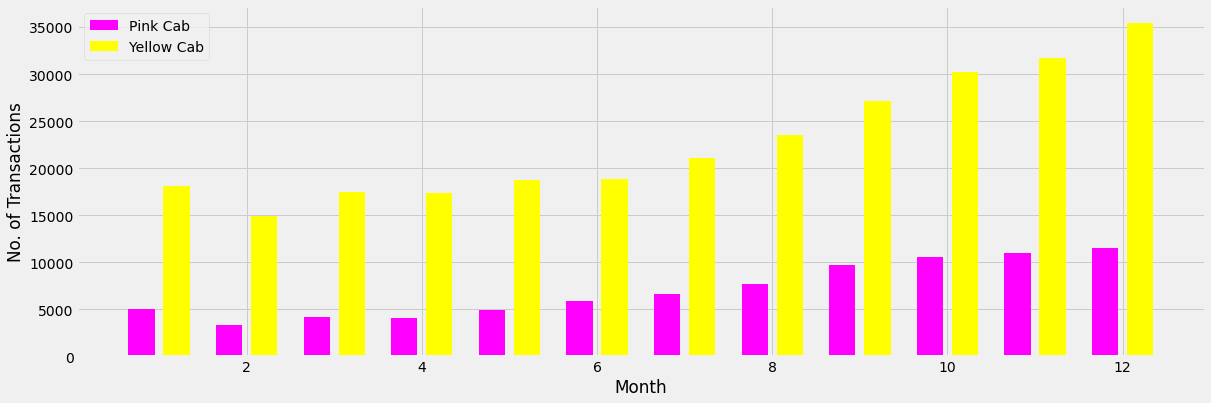

In [35]:
plt.figure(figsize = (18,6))
ax = plt.subplot(111)
ax.bar(diag3.index -0.2, diag3.values, width = 0.3, color = 'magenta', label = 'Pink Cab')
ax.bar(diag4.index + 0.2, diag4.values, width = 0.3, color = 'yellow', label = 'Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Month')
plt.legend()
plt.show()

Observation:
- Yellow can has a huge no of transactions within the 12 months of the year

In [36]:
cab_data[cab_data.Company == 'Pink Cab'].groupby(['Year']).Price_Charged.mean()

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64

In [37]:
cab_data[cab_data.Company == 'Yellow Cab'].groupby(['Year']).Price_Charged.mean()

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [38]:
cab_data[cab_data.Company == 'Pink Cab'].groupby(['Year']).Cost_of_Trip.mean()

Year
2016    247.008294
2017    248.836603
2018    248.412841
Name: Cost_of_Trip, dtype: float64

In [39]:
cab_data[cab_data.Company == 'Yellow Cab'].groupby(['Year']).Cost_of_Trip.mean()

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

from mean calculation you can see that average price charged by yellow cab are high than the average of pink cab

In [40]:
     
for col in customer_data.columns:
    if ' ' in col:
        customer_data = customer_data.rename(columns={col:col.replace(' ','_')})
        
for col in transaction_data.columns:
    if ' ' in col:
        transaction_data = transaction_data.rename(columns={col:col.replace(' ','_')})
    

In [41]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [42]:
city_data.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [43]:
customer_data.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [44]:
customer_data.tail()

,Customer_ID,Gender,Age,Income_(USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [45]:
transaction_data.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [46]:
transaction_data.tail()

,Transaction_ID,Customer_ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


### Combining Datasets into one major

In [47]:
left = cab_data.set_index(['Transaction_ID'])
right = transaction_data.set_index(['Transaction_ID'])
data = left.join(right)
data

,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...,...
10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,52392,Cash
10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,53286,Cash
10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,52265,Cash


In [48]:
left = data.set_index([data.index,'Customer_ID'])
right = customer_data.set_index(['Customer_ID'])
data = left.join(right)
data

,,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,,
10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Card,Male,28,10813
10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Card,Male,27,9237
10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242
10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327
10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651
10440104,53286,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528
10440105,52265,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966


In [49]:
data = data.reset_index()

In [105]:
data.to_csv('./DataSets/cab_data_master.csv')

In [106]:
data.shape

(359392, 15)

In [51]:
transact_city = data.groupby('City').Transaction_ID.count()
transact_city

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

Observation:
- transactions hapening in different cities.
- NY has a high number of transactions.

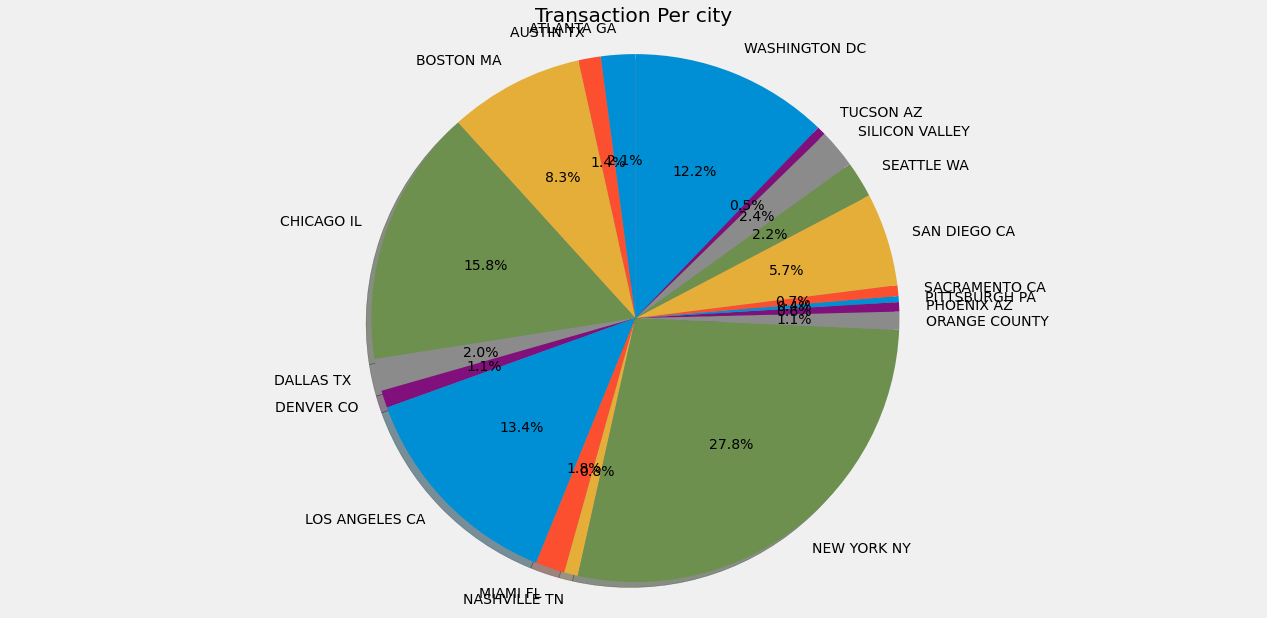

In [52]:
cities = transact_city.index
transactions = transact_city.values
fig, ax = plt.subplots(figsize = (20,10))
ax.pie(transactions, labels = cities, autopct='%1.1f%%',shadow=True, startangle=90,)
ax.axis('equal')
plt.title('Transaction Per city')
plt.show()

#### Payment

In [53]:
data.groupby(['Company', 'Payment_Mode']).Price_Charged.agg(['mean'])

mean
Company    Payment_Mode            
Pink Cab   Card          311.197319
           Cash          310.209299
Yellow Cab Card          457.924979
           Cash          458.567368

#### Gender Share

In [54]:
data.groupby(['Company','Gender']).Price_Charged.agg(['mean'])

mean
Company    Gender            
Pink Cab   Female  310.624823
           Male    310.940547
Yellow Cab Female  454.571538
           Male    460.821326

##### Observation
- Looks like yellow cab charges less for female customers but there were outliers in price charged column.

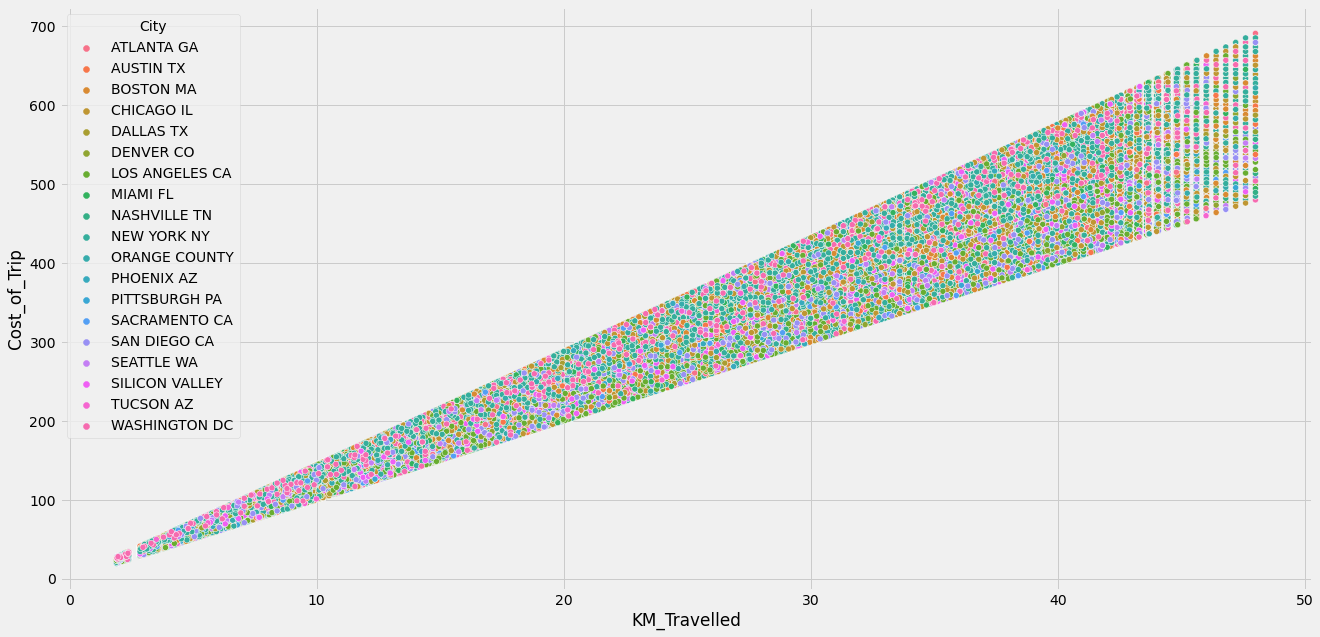

In [55]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="KM_Travelled", y="Cost_of_Trip", hue="City")
plt.show()

##### Observation
- Cost of trip is directly propotional to KM travelled.
- Cost of trip does'ntreally depend on city travelled to.

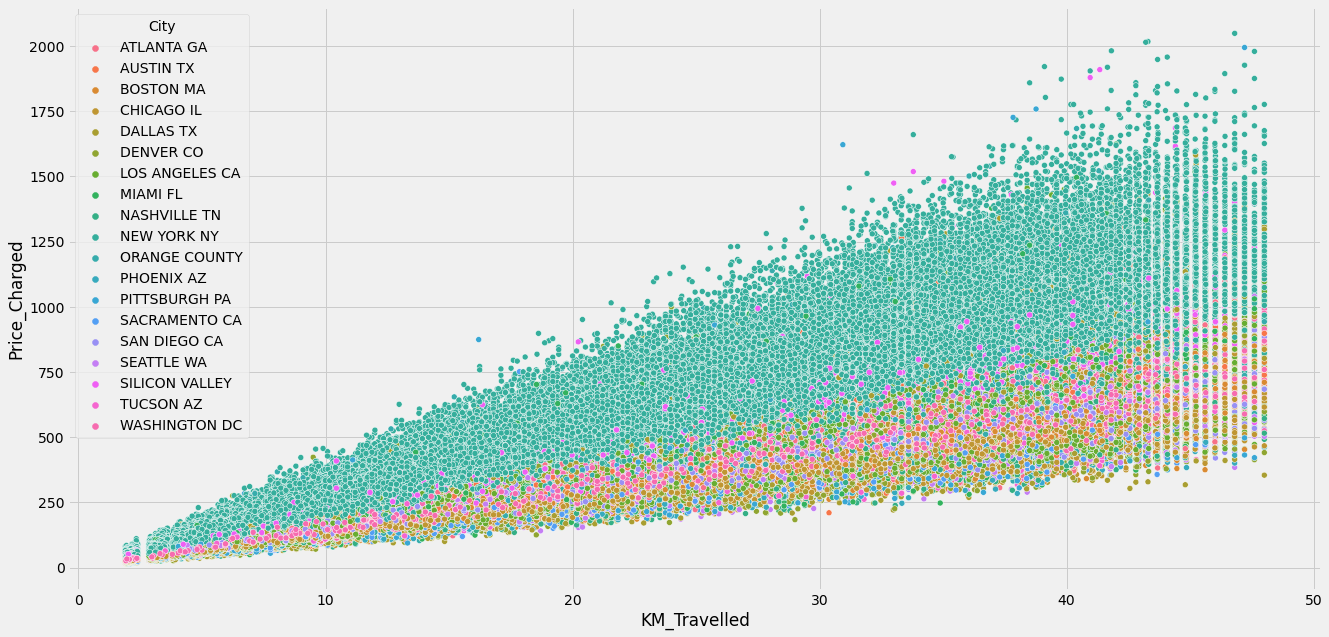

In [56]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="KM_Travelled", y="Price_Charged", hue="City")
plt.show()

##### Observation
- New York cost more in price charged for cabs.
- Seems New York has a high number of cab users.

#### Age Analysis

In [57]:
age_diag = data.groupby('Age').Customer_ID.nunique()

In [58]:
age_diag

Age
18    1450
19    1475
20    1535
21    1476
22    1499
23    1515
24    1442
25    1504
26    1485
27    1489
28    1500
29    1408
30    1457
31    1441
32    1492
33    1407
34    1548
35    1404
36    1433
37    1475
38    1417
39    1524
40    1456
41     491
42     493
43     498
44     458
45     524
46     508
47     503
48     502
49     502
50     509
51     496
52     497
53     479
54     479
55     468
56     490
57     462
58     502
59     517
60     473
61     550
62     462
63     481
64     505
65     467
Name: Customer_ID, dtype: int64

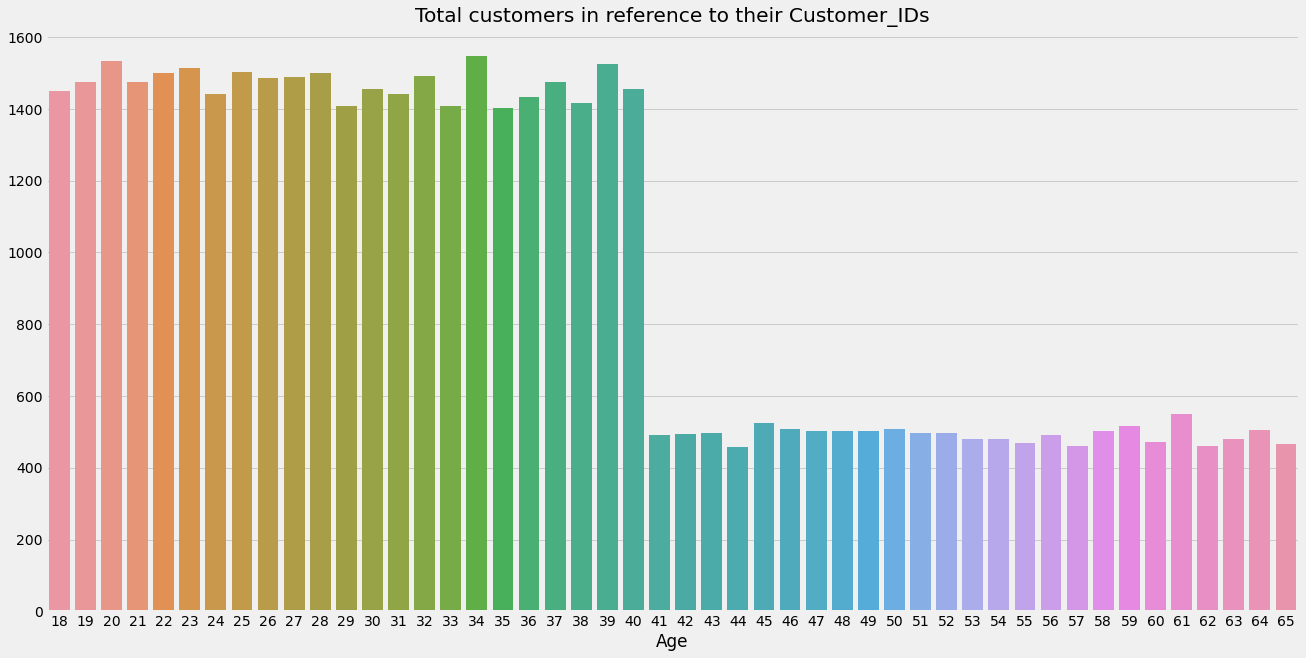

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x=age_diag.index,y=age_diag.values)
plt.title('Total customers in reference to their Customer_IDs')
plt.show()

In [60]:
age_diag2 = data.groupby('Age').Transaction_ID.count()

In [61]:
age_diag2 

Age
18    10846
19    11591
20    12229
21    11431
22    11796
23    12327
24    11151
25    11973
26    11655
27    12030
28    11163
29    10675
30    11165
31    10930
32    11959
33    11457
34    11825
35    10555
36    11054
37    11086
38    10906
39    11798
40    11536
41     3852
42     3970
43     3823
44     3725
45     4248
46     3918
47     4087
48     3700
49     4158
50     4089
51     3931
52     3784
53     3641
54     3810
55     3442
56     3742
57     3473
58     4107
59     4068
60     3775
61     4361
62     3530
63     3733
64     3908
65     3379
Name: Transaction_ID, dtype: int64

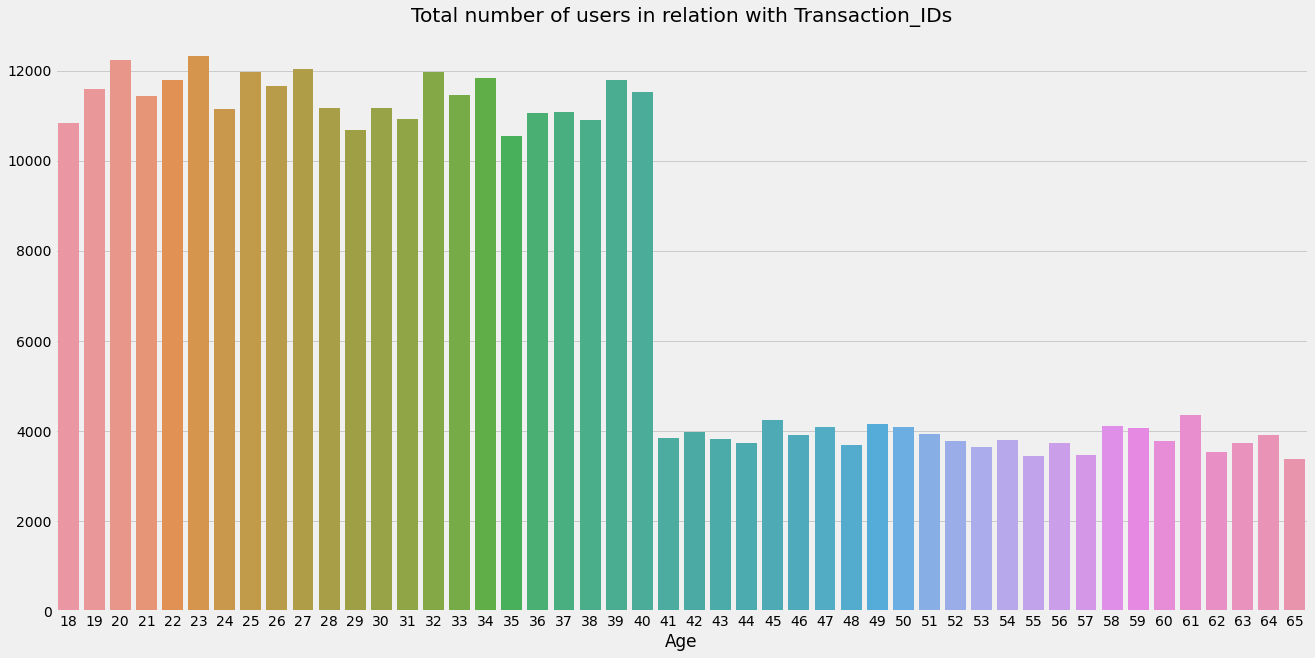

In [62]:
plt.figure(figsize = (20,10))
sns.barplot(x = age_diag2.index, y = age_diag2.values)
plt.title('Total number of users in relation with Transaction_IDs')
plt.show()

In [63]:
data.groupby(['Company']).Age.mean()

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

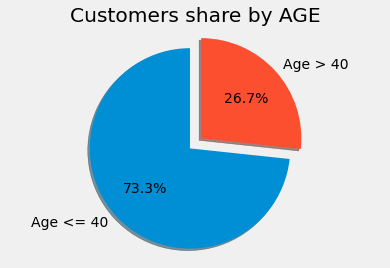

In [64]:
labels = 'Age <= 40','Age > 40'
pct = [age_diag[age_diag2.index<=40].values.sum(),age_diag[age_diag2.index>40].values.sum()]
explode = (0.15,0)
fig1, ax1 = plt.subplots()
ax1.pie(pct , explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Customers share by AGE')
plt.show()

In [65]:
company_age = data.groupby(['Company','Age']).Customer_ID.agg(['nunique'])
company_age = company_age.reset_index()
company_age

,Company,Age,nunique
0,Pink Cab,18,1028
1,Pink Cab,19,1062
2,Pink Cab,20,1072
3,Pink Cab,21,1016
4,Pink Cab,22,1041
...,...,...,...
91,Yellow Cab,61,477
92,Yellow Cab,62,397
93,Yellow Cab,63,411
94,Yellow Cab,64,425


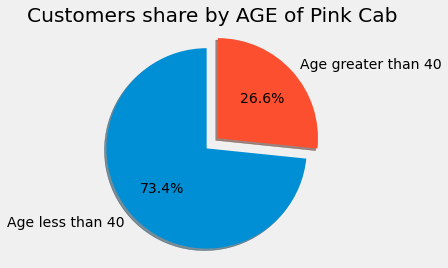

In [66]:
labels3 = 'Age less than 40','Age greater than 40' 
pct3 = [company_age[(company_age.Age<=40) & (company_age.Company=='Pink Cab')]['nunique'].sum(),company_age[(company_age.Age>40) & (company_age.Company=='Pink Cab')]['nunique'].sum() ]
explode3 = (0.15,0)
fig3, ax3 = plt.subplots()
ax3.pie(pct3 , explode=explode3, labels=labels3, autopct='%1.1f%%',
shadow=True, startangle=90)
ax3.axis('equal')

plt.title('Customers share by AGE of Pink Cab')
plt.show()

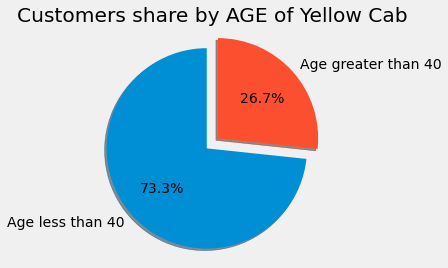

In [67]:
labels4 = 'Age less than 40','Age greater than 40' 
pct4 = [company_age[(company_age.Age<=40) & (company_age.Company=='Yellow Cab')]['nunique'].sum(),company_age[(company_age.Age>40) & (company_age.Company=='Yellow Cab')]['nunique'].sum() ]
fig4, ax4 = plt.subplots()
ax4.pie(pct4 ,explode = explode, labels=labels4, autopct='%1.1f%%',shadow=True, startangle=90)
ax4.axis('equal')

plt.title('Customers share by AGE of Yellow Cab')
plt.show()

#### Observation
- There is a slight difference in age group above 40 and below 40 in both cab usage.

In [68]:
data[data.Age<=40]['KM_Travelled'].mean()

22.562932149670704

In [69]:
data[data.Age>=40]['KM_Travelled'].mean()

22.573870767232627

In [70]:
data[data.Age<=40]['Price_Charged'].mean()

423.38327387150764

In [71]:
data[data.Age>=40]['Price_Charged'].mean()

423.11796790055433

- No difference in KMs travelled and price charged

##### Gender Analysis

In [72]:
data.groupby(['Company','Gender']).Customer_ID.nunique()

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

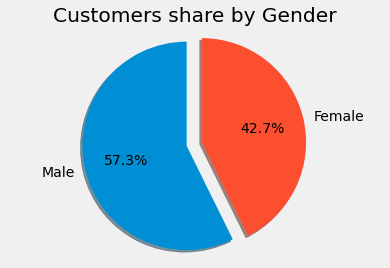

In [73]:
labels5 = 'Male','Female' 
pct5 = [data[(data.Gender=='Male') ]['Gender'].count(),data[(data.Gender=='Female') ]['Gender'].count() ]
fig5, ax5 = plt.subplots()
ax5.pie(pct5 ,explode = explode, labels=labels5, autopct='%1.1f%%',shadow=True, startangle=90)
ax5.axis('equal')

plt.title('Customers share by Gender')
plt.show()

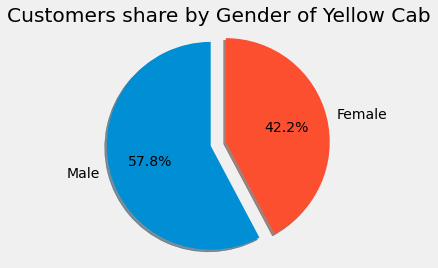

In [74]:
labels6 = 'Male','Female' 
pct6 = [data[(data.Gender=='Male') & (data.Company=='Yellow Cab')]['Gender'].count(),data[(data.Gender=='Female') & (data.Company=='Yellow Cab')]['Gender'].count() ]
fig6, ax6 = plt.subplots()
ax6.pie(pct6 ,explode = explode, labels=labels6, autopct='%1.1f%%',shadow=True, startangle=90)
ax6.axis('equal')

plt.title('Customers share by Gender of Yellow Cab')
plt.show()

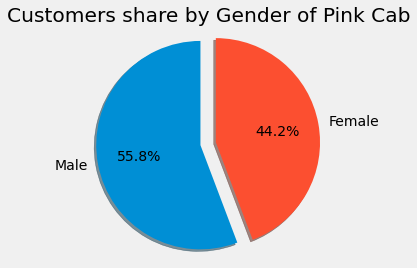

In [75]:
labels7 = 'Male','Female' 
pct7 = [data[(data.Gender=='Male') & (data.Company=='Pink Cab')]['Gender'].count(),data[(data.Gender=='Female') & (data.Company=='Pink Cab')]['Gender'].count() ]
fig7, ax7 = plt.subplots()
ax7.pie(pct7 ,explode = explode, labels=labels7, autopct='%1.1f%%',shadow=True, startangle=90)
ax7.axis('equal')

plt.title('Customers share by Gender of Pink Cab')
plt.show()

In [76]:
data.groupby(['Company','Year','Gender']).Transaction_ID.count()

Company     Year  Gender
Pink Cab    2016  Female    10873
                  Male      14207
            2017  Female    13475
                  Male      16846
            2018  Female    13132
                  Male      16178
Yellow Cab  2016  Female    33861
                  Male      48378
            2017  Female    41785
                  Male      56404
            2018  Female    40354
                  Male      53899
Name: Transaction_ID, dtype: int64

- No specific likes among gender, fair distribution of customers

##### Customer Share

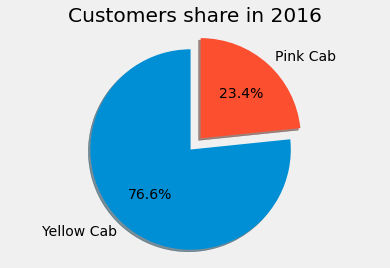

In [77]:
labels8 = 'Yellow Cab','Pink Cab' 
pct8 = [data[(data.Year==2016) & (data.Company=='Yellow Cab')]['Customer_ID'].count(),data[(data.Year==2016) & (data.Company=='Pink Cab')]['Customer_ID'].count() ]
fig8, ax8 = plt.subplots()
ax8.pie(pct8 ,explode = explode, labels=labels8, autopct='%1.1f%%',shadow=True, startangle=90)
ax8.axis('equal')

plt.title('Customers share in 2016')
plt.show()

In [78]:
print(pct8)

[82239, 25080]


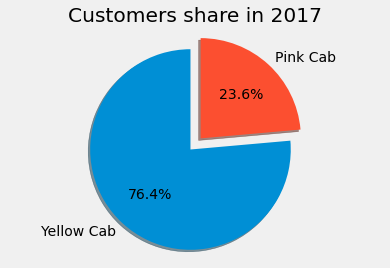

In [79]:
labels9 = 'Yellow Cab','Pink Cab' 
pct9 = [data[(data.Year==2017) & (data.Company=='Yellow Cab')]['Customer_ID'].count(),data[(data.Year==2017) & (data.Company=='Pink Cab')]['Customer_ID'].count() ]
fig9, ax9 = plt.subplots()
ax9.pie(pct9 ,explode = explode, labels=labels9, autopct='%1.1f%%',shadow=True, startangle=90)
ax9.axis('equal')

plt.title('Customers share in 2017')
plt.show()

In [80]:
print(pct9)

[98189, 30321]


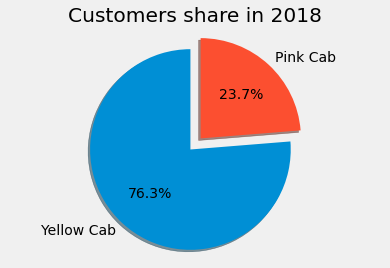

In [81]:
labels10 = 'Yellow Cab','Pink Cab' 
pct10 = [data[(data.Year==2018) & (data.Company=='Yellow Cab')]['Customer_ID'].count(),data[(data.Year==2018) & (data.Company=='Pink Cab')]['Customer_ID'].count() ]
fig10, ax10 = plt.subplots()
ax10.pie(pct10 ,explode = explode, labels=labels10, autopct='%1.1f%%',shadow=True, startangle=90)
ax10.axis('equal')

plt.title('Customers share in 2018')
plt.show()

In [82]:
print(pct10)

[94253, 29310]


#### Observation
- from our analysis of the three years Yellow CAb has a high number of user, while Pink Cab has a low customer base but it increases each year within the three year period.

#### KM travelled share

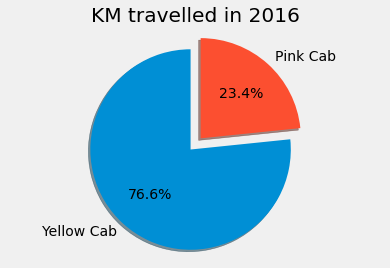

In [83]:
labels11 = 'Yellow Cab','Pink Cab' 
pct11 = [data[(data.Year==2016) & (data.Company=='Yellow Cab')]['KM_Travelled'].count(),data[(data.Year==2016) & (data.Company=='Pink Cab')]['KM_Travelled'].count() ]
fig11, ax11 = plt.subplots()
ax11.pie(pct11 ,explode = explode, labels=labels11, autopct='%1.1f%%',shadow=True, startangle=90)
ax11.axis('equal')

plt.title('KM travelled in 2016')
plt.show()

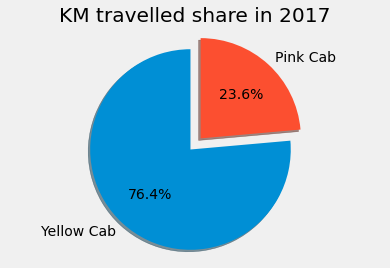

In [84]:
labels12 = 'Yellow Cab','Pink Cab' 
pct12 = [data[(data.Year==2017) & (data.Company=='Yellow Cab')]['KM_Travelled'].count(),data[(data.Year==2017) & (data.Company=='Pink Cab')]['KM_Travelled'].count() ]
fig12, ax12 = plt.subplots()
ax12.pie(pct12 ,explode = explode, labels=labels12, autopct='%1.1f%%',shadow=True, startangle=90)
ax12.axis('equal')

plt.title('KM travelled share in 2017')
plt.show()

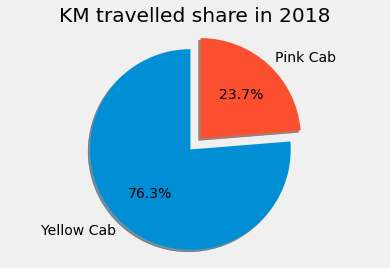

In [85]:
labels13 = 'Yellow Cab','Pink Cab' 
pct13 = [data[(data.Year==2018) & (data.Company=='Yellow Cab')]['Customer_ID'].count(),data[(data.Year==2018) & (data.Company=='Pink Cab')]['Customer_ID'].count() ]
fig13, ax13 = plt.subplots()
ax13.pie(pct13 ,explode = explode, labels=labels13, autopct='%1.1f%%',shadow=True, startangle=90)
ax13.axis('equal')

plt.title('KM travelled share in 2018')
plt.show()

#### Customer Share NY

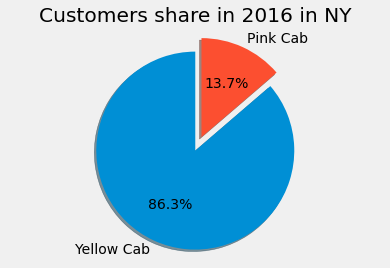

In [86]:
labels13 = 'Yellow Cab','Pink Cab' 
pct13 = [data[(data.Year==2016) & (data.Company=='Yellow Cab') & (data.City=='NEW YORK NY') ]['Customer_ID'].count(),data[(data.Year==2016) & (data.Company=='Pink Cab') & (data.City=='NEW YORK NY')]['Customer_ID'].count() ]
fig13, ax13 = plt.subplots()
ax13.pie(pct13 ,explode = explode, labels=labels13, autopct='%1.1f%%',shadow=True, startangle=90)
ax13.axis('equal')

plt.title('Customers share in 2016 in NY')
plt.show()

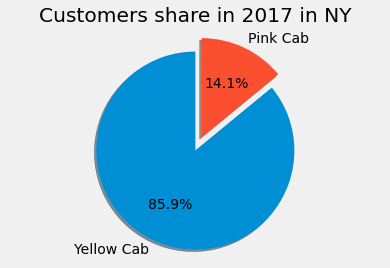

In [87]:
labels14 = 'Yellow Cab','Pink Cab' 
pct14 = [data[(data.Year==2017) & (data.Company=='Yellow Cab') & (data.City=='NEW YORK NY') ]['Customer_ID'].count(),data[(data.Year==2017) & (data.Company=='Pink Cab') & (data.City=='NEW YORK NY')]['Customer_ID'].count() ]
fig14, ax14 = plt.subplots()
ax14.pie(pct14 ,explode = explode, labels=labels14, autopct='%1.1f%%',shadow=True, startangle=90)
ax14.axis('equal')

plt.title('Customers share in 2017 in NY')
plt.show()

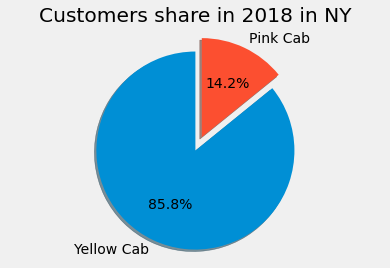

In [88]:
labels15 = 'Yellow Cab','Pink Cab' 
pct15 = [data[(data.Year==2018) & (data.Company=='Yellow Cab') & (data.City=='NEW YORK NY') ]['Customer_ID'].count(),data[(data.Year==2018) & (data.Company=='Pink Cab') & (data.City=='NEW YORK NY')]['Customer_ID'].count() ]
fig15, ax15 = plt.subplots()
ax15.pie(pct15 ,explode = explode, labels=labels15, autopct='%1.1f%%',shadow=True, startangle=90)
ax15.axis('equal')

plt.title('Customers share in 2018 in NY')
plt.show()

##### Analsysis of Profit

In [89]:
data['Margin'] =  (data['Price_Charged']-data['Cost_of_Trip'])

In [90]:
data.head()

,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Margin
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,Card,Male,28,10813,57.315
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,Card,Male,27,9237,23.666
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,27.568
3,10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,25.798
4,10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,Card,Male,33,8536,16.844


In [91]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income_(USD/Month)','Margin']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Margin
KM_Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056
Month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352
Year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093
Income_(USD/Month),-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148
Margin,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000


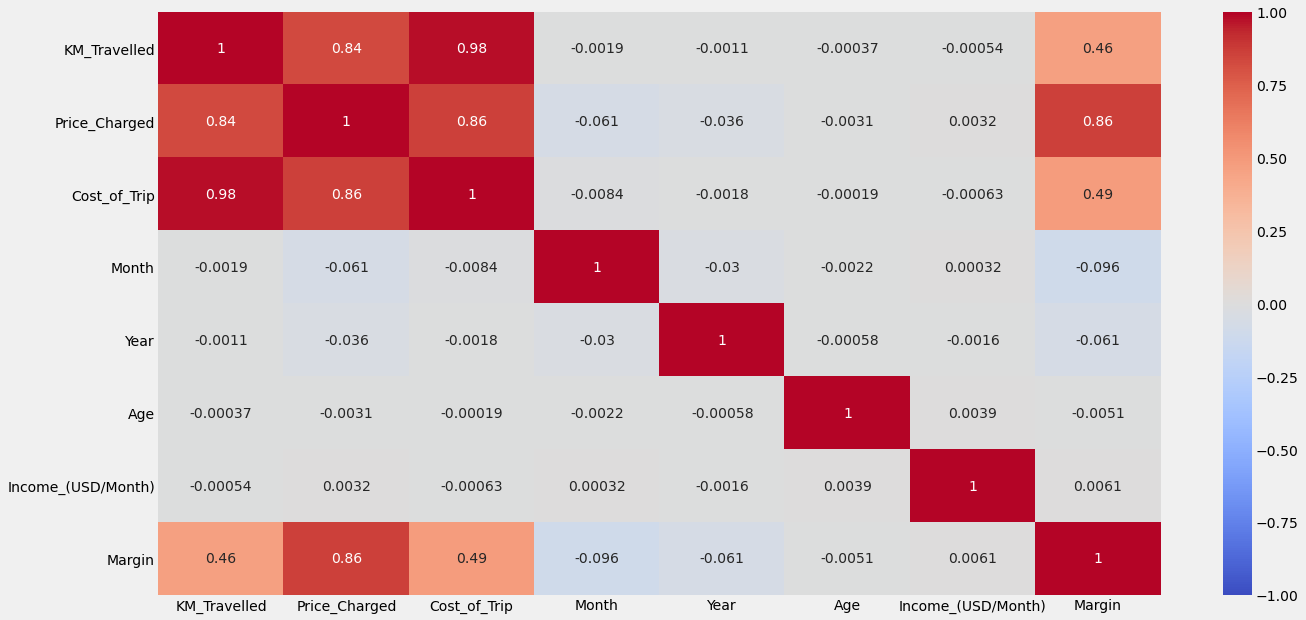

In [92]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

In [93]:
city_margin = data[data.Month==12].groupby('City').Margin.mean()
city_margin

City
ATLANTA GA         95.844236
AUSTIN TX          90.535487
BOSTON MA          61.158200
CHICAGO IL         49.166594
DALLAS TX         107.653009
DENVER CO         111.229893
LOS ANGELES CA     78.671170
MIAMI FL           98.341176
NASHVILLE TN       78.562585
NEW YORK NY       256.663241
ORANGE COUNTY      71.696141
PHOENIX AZ         72.779471
PITTSBURGH PA      50.946547
SACRAMENTO CA      23.995713
SAN DIEGO CA       67.587428
SEATTLE WA         75.043692
SILICON VALLEY    161.907324
TUCSON AZ          83.594826
WASHINGTON DC      60.778328
Name: Margin, dtype: float64

#### Margins of  NY

In [94]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margin.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margin.mean()

In [95]:
dt1

Year  Month
2016  1         92.129950
      2        128.794693
      3        114.400288
      4         85.057904
      5         48.949528
      6         27.788159
      7         44.201281
      8         91.624815
      9         68.818719
      10       147.491823
      11       135.107955
      12       173.581389
2017  1        156.038906
      2        100.310480
      3         65.847218
      4         65.405556
      5         62.795648
      6         61.110410
      7         96.887832
      8         54.513166
      9         90.443586
      10       133.755330
      11       129.812623
      12       202.798411
2018  1         94.239281
      2         92.877017
      3         83.393463
      4         82.761664
      5         38.335734
      6         29.274855
      7         55.449930
      8         60.953666
      9         64.411242
      10       113.972785
      11       123.915903
      12       144.376084
Name: Margin, dtype: float64

In [96]:
dt2

Year  Month
2016  1        400.349650
      2        440.934082
      3        349.676596
      4        338.014526
      5        404.995508
      6        423.916788
      7        346.703697
      8        263.712006
      9        286.905845
      10       246.142440
      11       313.424911
      12       285.749407
2017  1        314.788733
      2        405.466787
      3        399.774565
      4        384.812952
      5        438.278403
      6        374.323523
      7        298.894283
      8        276.965852
      9        292.686664
      10       251.092332
      11       300.103172
      12       267.598571
2018  1        280.904014
      2        372.401036
      3        331.996255
      4        337.040045
      5        390.918328
      6        359.371863
      7        289.008824
      8        248.103224
      9        261.518718
      10       251.091115
      11       245.083449
      12       261.914382
Name: Margin, dtype: float64

In [97]:
margin_data = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

In [98]:
margin_data2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

In [99]:
margin_data

,Margins_pink,Transactions_pink
0,92.129950,927
1,128.794693,1050
2,114.400288,1231
3,85.057904,1240
4,48.949528,1567
5,27.788159,1730
6,44.201281,2125
7,91.624815,2272
8,68.818719,2854
9,147.491823,3334


In [100]:
margin_data2

,Margins_yellow,Transactions_yellow
0,400.349650,3719
1,440.934082,4674
2,349.676596,5146
3,338.014526,5360
4,404.995508,5967
5,423.916788,5667
6,346.703697,6814
7,263.712006,6918
8,286.905845,8130
9,246.142440,9697


In [101]:
margin_data.corr()

,Margins_pink,Transactions_pink
Margins_pink,1.000000,0.499074
Transactions_pink,0.499074,1.000000


In [102]:
margin_data2.corr()

,Margins_yellow,Transactions_yellow
Margins_yellow,1.000000,-0.761895
Transactions_yellow,-0.761895,1.000000


#### Monthly Margins of pink cab

- This shows that Pink Cabs  margins increase with increase in number of Transations

In [103]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

NameError: name 'dd1' is not defined

<Figure size 360x360 with 0 Axes>

##### Margins for yellow cab

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

### Observation
-This shows that Yellow cab  margins decrease with increase of transactions.
- This means with increase in transactions there a corresponding decrease in price charged and cost per trip.

In [ ]:
data.groupby(['Gender','Company']).Margins.mean()

##### Observation
- you can notice there is a huge difference on mean margins for male and female in yellow cabs
- do they charge different, thats something we need to look at?

#### T TEST to checking that hypothesis for Yellow Cabs

In [ ]:
a = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a statistical difference')
else:
    print('We accept null hypothesis that theres no statistical difference')
    
print('P value is ', p_value)

### For Pink Cabs

In [ ]:
a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

### Is there difference or no difference in KM travelled?

In [ ]:
a = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

- There is no difference hence means that generally yellow  Cabs gives discount to women maybe assumption:
1. Mothers who have young ones 
2. Pregnant ladies

In [ ]:
a = data[(data.Age<=45)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>45)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

In [ ]:
a = data[(data.Age<=45)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>45)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

- This shows Yellow Cabs give discounts to old peoeple

#### Is There a difference in margins for mode of payment cash or card?

In [ ]:
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

In [ ]:
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

## Female Customer share

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2016) & (data.Company=='Yellow Cab') &(data.Gender=='Female') ]['Customer_ID'].nunique(),data[(data.Year==2016) & (data.Company=='Pink Cab') & (data.Gender=='Female')]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Female Customers share in 2016 ')
plt.show()

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2017) & (data.Company=='Yellow Cab') &(data.Gender=='Female') ]['Customer_ID'].nunique(),data[(data.Year==2017) & (data.Company=='Pink Cab') & (data.Gender=='Female')]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Female Customers share in 2017 ')
plt.show()

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2018) & (data.Company=='Yellow Cab') &(data.Gender=='Female') ]['Customer_ID'].nunique(),data[(data.Year==2018) & (data.Company=='Pink Cab') & (data.Gender=='Female')]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Female Customers share in 2018 ')
plt.show()

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2016) & (data.Company=='Yellow Cab') &(data.Age>45) ]['Customer_ID'].nunique(),data[(data.Year==2016) & (data.Company=='Pink Cab') & (data.Age>45)]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Past Customers share in 2016 ')
plt.show()

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2018) & (data.Company=='Yellow Cab') &(data.Age>45) ]['Customer_ID'].nunique(),data[(data.Year==2018) & (data.Company=='Pink Cab') & (data.Age>45)]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Past Customers share in 2018 ')
plt.show()

Observation:
- Yellow cab company is loosing Female customers and the elderly to the service of pink cabs
- This maybe a reason for giving out incentives to the two groups

#### Coclusion of Analysis
- Initially in analysis outliers in price charged could be identified but through further analysis this could be a result of discounts offered by Yellow Cab Company.
- Yellow Cab offers discount which favour Female and olderly customers.
- Margins of Yellow Cab decreases with the increase of transactions while Pink Cab margins increases with increase of transactions. The model Yellow Cab usage is favourable this shows during peak periods prices charged or cost per trip rates decrease making it favourable.
- Pink Cab has a higher number of Young customer base in which shows potential of growth given improvement of their business model.
- Yellow Cab will maintain a monopoly in the market